 **LIBRARIES USED**

In [13]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns

**Reading Dataset**

In [4]:
df = pd.read_csv('Housing.csv')
print("Dataframe shape: ",df.shape)
df.info()

Dataframe shape:  (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Preprocessing**

In [6]:
# Clean Dataset
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)# Drop duplicates and update the dataframe

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


**Sorting Data into Test and Train**

In [35]:
print(df['price'].head())  # Check the structure of the 'price' column
print(df[['price']].head())

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64
      price
0  13300000
1  12250000
2  12250000
3  12215000
4  11410000


In [41]:
X = df.drop(['price'],axis=1)
Y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

**Data Exploration**

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'furnishingstatus'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

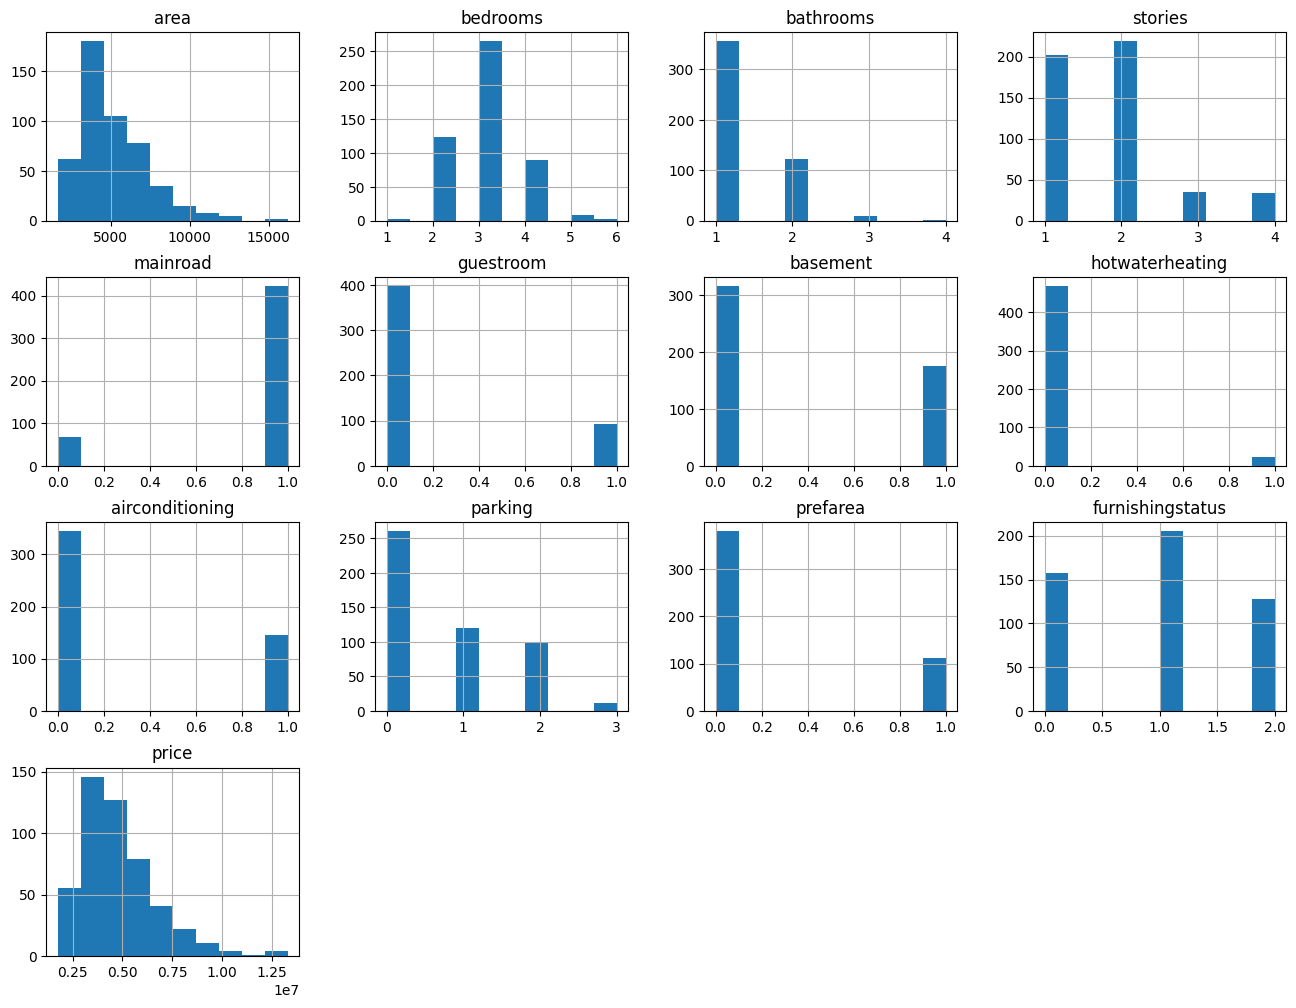

In [ ]:
train_data=X_train.join(y_train)
train_data.hist(figsize=(16,12))

<Axes: >

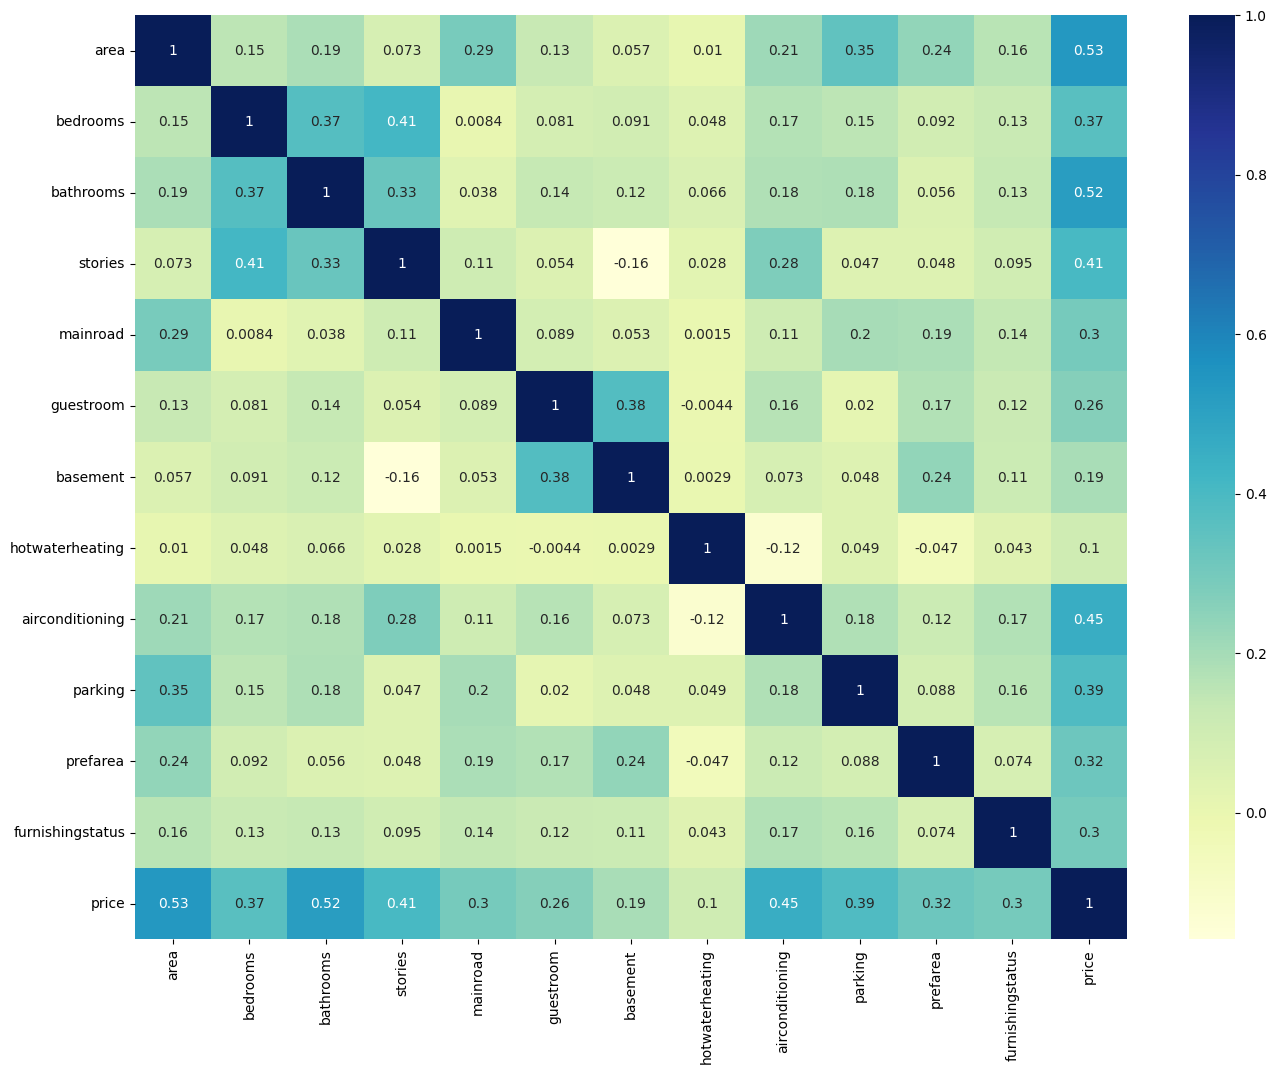

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

**Model learning**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#Scaling Input Data
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

model = LinearRegression()

# Trainign the model
model.fit(X_train_s, y_train)

LinearRegression()

 **Model Evaluation**

Model Score on test:  68.11028422155184


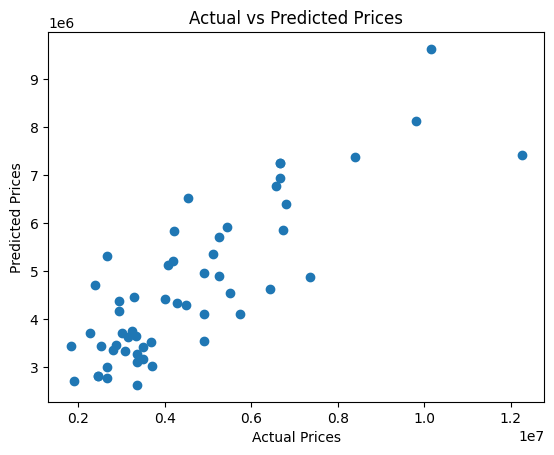

In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test_s)
# Evaluating the model
print("Model Score on test: ",model.score(X_test_s,y_test)*100)

# visualizing the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
# Function to get user input and make a prediction
def predict_house_price(model, scaler):
    # Define the feature names
    feature_names = [
        'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
        'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'parking', 'prefarea', 'furnishingstatus'
    ]

    # Initialize an empty list to store user inputs
    user_input = []

    # Loop over each feature and get the user input
    for feature in feature_names:
        value = float(input(f"Enter the value for {feature}: "))
        user_input.append(value)

    # Convert user input to a numpy array and reshape it
    user_input = np.array(user_input).reshape(1, -1)

    # Scale the user input using the same scaler used during training
    user_input_scaled = scaler.transform(user_input)

    # Make a prediction using the trained model
    prediction = model.predict(user_input_scaled)

    # Print the predicted price
    print(f"The predicted house price is: {prediction[0]}")

# Example usage (assuming model and scaler are already defined and trained)
predict_house_price(model, scaler)

Enter the value for area: 7420
Enter the value for bedrooms: 4
Enter the value for bathrooms: 2
Enter the value for stories: 3
Enter the value for mainroad: 1
Enter the value for guestroom: 0
Enter the value for basement: 0
Enter the value for hotwaterheating: 0
Enter the value for airconditioning: 1
Enter the value for parking: 2
Enter the value for prefarea: 1
Enter the value for furnishingstatus: 2
The predicted house price is: 8219167.701927917


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Storing and Loading model**

In [48]:
import joblib

joblib.dump(model,'LinearRegression_housePricePredictor')

['LinearRegression_housePricePredictor']

In [49]:
model_loaded=joblib.load('LinearRegression_housePricePredictor')